# Wine Quality Predictor

### This project will revolve around the files 'winequality-white.csv' and 'winequality-red.csv', as they'll be used to create a multi-classification model. These are the main objectives of the project: 

1. Build a wine quality model, to check which variables increase the chance of the wine being seen as good quality.

2. Comprehend the difference between the red wine model and the white wine model classification. That's why, we'll build two seperately models for both of them. 

3. Understand the tools which will be needed for multiple variable classification. 

4. Work around gradients, activation functions, epochs and batch-sizes to improve the model.

5. Lastly, improve the data analysis behind the project, and work around it with the statistics.

### For the start , allow us to go with the white wine model first, as it's more complex and has more rows than the red counterpart. (Stating that we've got the concataned version of the DataSet)

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


 Ok, so we can see that we have some distributions for each variable, we'll have to check some variables, and see which ones we'll work with. First of all, we have to see if there's any NaN value, before we move on.

In [4]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [4]:
df = df[df['fixed acidity'].isnull() != True]

In [11]:
df.isnull().sum()

type                    0
fixed acidity           6
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df = df[df['volatile acidity'].isnull() != True]
df = df[df['citric acid'].isnull() != True]
df = df[df['residual sugar'].isnull() != True]
df = df[df['chlorides'].isnull() != True]
df = df[df['pH'].isnull() != True]
df = df = df[df['sulphates'].isnull() != True]

In [7]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We could do that, since the rows that were empty, only represented a very little part of the dataset, we could compute its percentage by the following: 

In [9]:
(df.isnull().sum().sum()/df.size) * 100

0.04499117936088846

In [21]:
df.size

84019

This comparison is valid, as both data are 2d related, we aren't just counting the rows, but indeed the whole quantity of non empty values, to the total values. Let's check the distribution for the red and white wines now.

Text(0.5, 9.444444444444438, 'Type of wine')

<Figure size 1200x800 with 0 Axes>

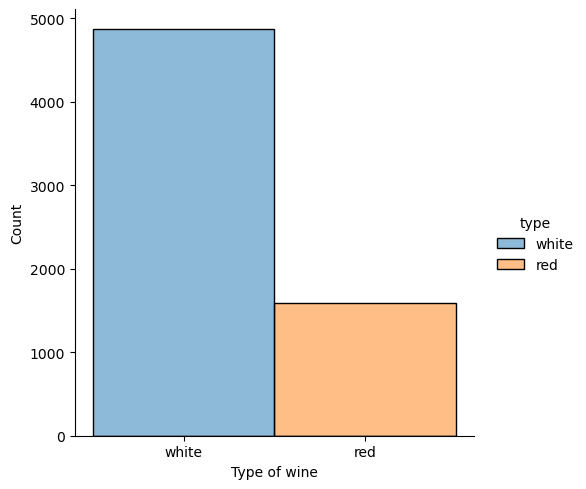

In [29]:
plt.figure(figsize = (12,8))
sns.displot(data = df, x = 'type', hue = 'type')
plt.xlabel('Type of wine')

In [6]:
df[df['type'] == 'white']['type'].count()/len(df)

0.7535200371344577

In [23]:
df[df['type'] == 'red']['type'].count()/len(df)

0.24647996286554233

As we can see, most of our training data and testing data will be mostly composed by the 'white' section. So, let's firstly create a heatmap with correlations, for each class. Then, we will compare the correlations, and see where to go with our project.

<AxesSubplot:>

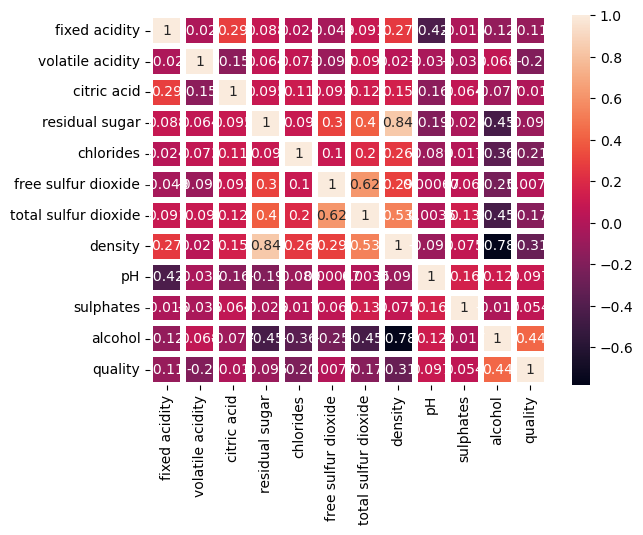

In [24]:
sns.heatmap(df[df['type'] == 'white'].corr(), annot = True, linewidth = 3)

In [25]:
print((df[df['type'] == 'white'].corr() < 0).sum())
print('\n')
print( "Correlations which are below zero: " + str((df[df['type'] == 'white'].corr() < 0).sum().sum()))

fixed acidity           6
volatile acidity        6
citric acid             4
residual sugar          4
chlorides               3
free sulfur dioxide     3
total sulfur dioxide    2
density                 3
pH                      6
sulphates               4
alcohol                 8
quality                 7
dtype: int64


Correlations which are below zero: 56


<AxesSubplot:>

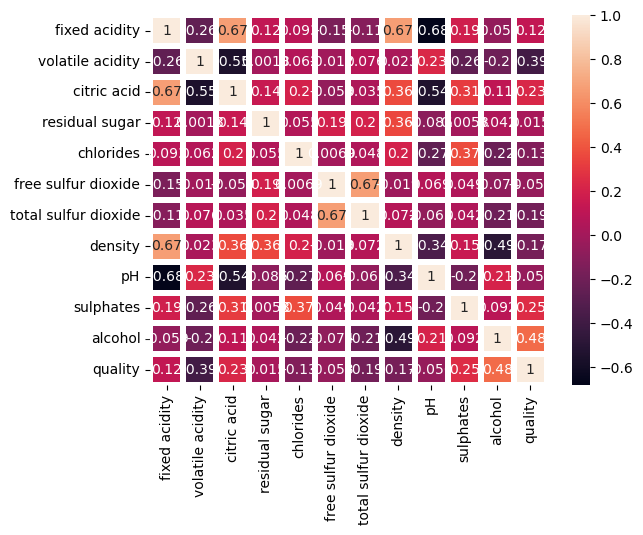

In [26]:
sns.heatmap(df[df['type'] == 'red'].corr(), annot = True, linewidth = 3)

In [27]:
print((df[df['type'] == 'white'].corr() < 0).sum())
print('\n')
print( "Correlations which are below zero: " + str((df[df['type'] == 'red'].corr() < 0).sum().sum()))

fixed acidity           6
volatile acidity        6
citric acid             4
residual sugar          4
chlorides               3
free sulfur dioxide     3
total sulfur dioxide    2
density                 3
pH                      6
sulphates               4
alcohol                 8
quality                 7
dtype: int64


Correlations which are below zero: 54


It's nice to state that they have lots of differences, when comparing the same variable. Take, for example, the 'density x residual sugar' relation on the White Wine, ~0.84. However, when we compare the same relation on the Red Wine, we get a total difference, since its value is ~0.36. Because of this, to understand the dataset as a whole, and display better classification for each type, we'll have to analyze the Heatmap of both types, altogether. 

<AxesSubplot:>

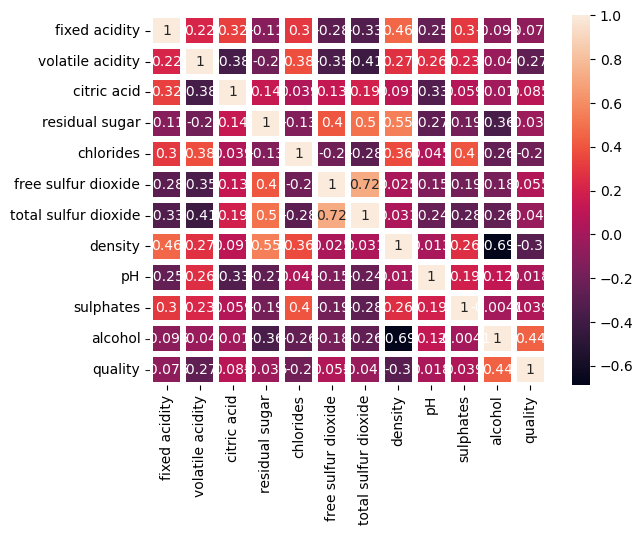

In [28]:
sns.heatmap(df.corr(), annot = True, linewidth = 3)

In [29]:
print((df.corr() < 0).sum())
print('\n')
print( "Correlations which are below zero: " + str((df.corr() < 0).sum().sum()))

fixed acidity           6
volatile acidity        6
citric acid             3
residual sugar          7
chlorides               5
free sulfur dioxide     6
total sulfur dioxide    7
density                 2
pH                      5
sulphates               4
alcohol                 9
quality                 6
dtype: int64


Correlations which are below zero: 66


This looks like a more realistical approach, as the stats are distributed by weight of their correlations. Thefore, we'll proceed with this 'generalization'. 

<AxesSubplot:xlabel='quality', ylabel='count'>

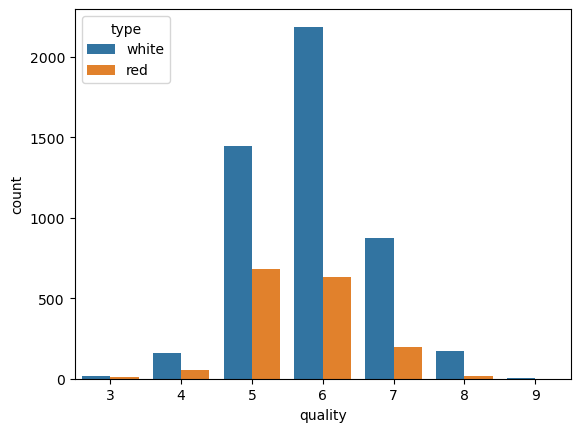

In [30]:
sns.countplot(data = df, x = 'quality', hue = 'type')

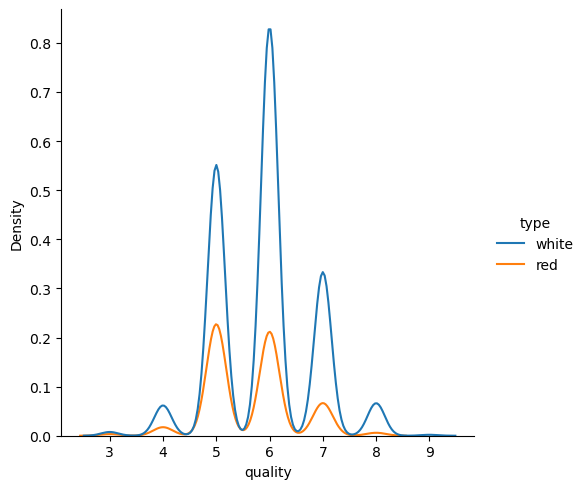

In [31]:
sns.displot(data = df, x = 'quality', hue = 'type', kind = 'kde')

It's nice to notice that this Density x quality relation has a distribution which vaguely remembers the function sin(x). If we take x = 3 (quality) as the start of the value, it has approximately a 0 value for y. It could be seen as 0 pi, however, since the values also don't do down from the variance of sin(x), which states: - 1 <= sin(x) <= 1. Also, by not having the negative values, we'd have to take the absolute values from sin(x).

For a matter of fact for better comprehension of the data set, allow us to draw the graph y = abs(sin(x))

Text(0.5, 1.0, 'abs(sin(x)) graph')

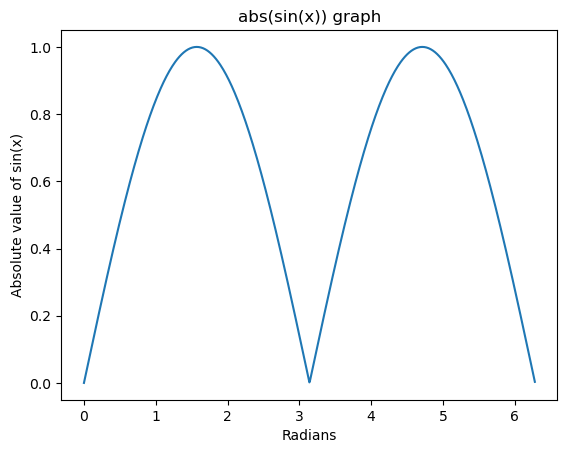

In [13]:
X = np.arange(0, 2*np.pi, 0.01)
y = np.abs(np.sin(X))

plt.plot(X,y)
plt.xlabel('Radians')
plt.ylabel('Absolute value of sin(x)')
plt.title('abs(sin(x)) graph')

This makes us understand that the density (wine classification numbers) of our dataset is non-linear, thefore, the best approach would be just straight-forward and  understand how they are alocated.

In [14]:
data_analyze = df.groupby("quality").describe()

In [15]:
data_analyze

fixed acidity                                                     \
                count      mean       std  min    25%   50%    75%   max   
quality                                                                    
3                30.0  7.853333  1.747853  4.2  6.800  7.45  8.575  11.8   
4               214.0  7.281308  1.257550  4.6  6.425  7.00  8.000  12.5   
5              2128.0  7.329699  1.261062  4.5  6.500  7.10  7.800  15.9   
6              2820.0  7.180035  1.293269  3.8  6.400  6.90  7.600  14.3   
7              1074.0  7.131425  1.374526  4.2  6.300  6.90  7.475  15.6   
8               192.0  6.838542  1.149311  3.9  6.200  6.80  7.300  12.6   
9                 5.0  7.420000  0.983362  6.6  6.900  7.10  7.400   9.1   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   30.0  0.517000  ...     0.565  0.86    30.0  10.215000   
4                  214.0  0.458084  ...     0.570  2.00   214.0  10.176636   
5                 2128.0  0.389774  ...     0.580  1.98  2128.0   9.838759   
6                 2820.0  0.313598  ...     0.600  1.95  2820.0  10.588475   
7                 1074.0  0.289055  ...     0.640  1.36  1074.0  11.389572   
8                  192.0  0.289089  ...     0.600  1.10   192.0  11.672917   
9                    5.0  0.298000  ...     0.480  0.61     5.0  12.180000   

                                                     
              std   min      25%    50%   75%   max  
quality                                              
3        1.106497   8.0   9.6250  10.15  11.0  12.6  
4        0.988925   8.4   9.4000  10.00  10.9  13.5  
5        0.815633   8.0   9.3000   9.60  10.3  14.9  
6        1.126212   8.4   9.6000  10.50  11.4  14.0  
7        1.199048   8.6  10.6625  11.40  12.3  14.2  
8        1.279682   8.5  11.0000  11.95  12.6  14.0  
9        1.013410  10.4  12.4000  12.50  12.7  12.9  

[7 rows x 88 columns]

In [16]:
for variable in df.columns[1:12]:
    print("Column to be analyzed: ", variable)
    print(data_analyze[variable])
    print("\n")

Column to be analyzed:  fixed acidity
          count      mean       std  min    25%   50%    75%   max
quality                                                           
3          30.0  7.853333  1.747853  4.2  6.800  7.45  8.575  11.8
4         214.0  7.281308  1.257550  4.6  6.425  7.00  8.000  12.5
5        2128.0  7.329699  1.261062  4.5  6.500  7.10  7.800  15.9
6        2820.0  7.180035  1.293269  3.8  6.400  6.90  7.600  14.3
7        1074.0  7.131425  1.374526  4.2  6.300  6.90  7.475  15.6
8         192.0  6.838542  1.149311  3.9  6.200  6.80  7.300  12.6
9           5.0  7.420000  0.983362  6.6  6.900  7.10  7.400   9.1


Column to be analyzed:  volatile acidity
          count      mean       std   min     25%    50%     75%    max
quality                                                                
3          30.0  0.517000  0.341913  0.17  0.2525  0.415  0.6325  1.580
4         214.0  0.458084  0.230235  0.11  0.2800  0.380  0.6100  1.130
5        2128.0  0.389774  0

In [17]:
for variable in df.columns[1:12]:
    print("Column to be correlated: ", variable)
    print(data_analyze[variable].corr())
    print("\n")

Column to be correlated:  fixed acidity
          count      mean       std       min       25%       50%       75%  \
count  1.000000 -0.222699 -0.010864 -0.410603 -0.332704 -0.296551 -0.176043   
mean  -0.222699  1.000000  0.609611  0.281382  0.836886  0.975269  0.831506   
std   -0.010864  0.609611  1.000000 -0.542612  0.115785  0.631872  0.827844   
min   -0.410603  0.281382 -0.542612  1.000000  0.716971  0.233096 -0.196766   
25%   -0.332704  0.836886  0.115785  0.716971  1.000000  0.802882  0.432830   
50%   -0.296551  0.975269  0.631872  0.233096  0.802882  1.000000  0.844657   
75%   -0.176043  0.831506  0.827844 -0.196766  0.432830  0.844657  1.000000   
max    0.719577 -0.325655  0.254964 -0.690474 -0.660308 -0.321674 -0.051491   

            max  
count  0.719577  
mean  -0.325655  
std    0.254964  
min   -0.690474  
25%   -0.660308  
50%   -0.321674  
75%   -0.051491  
max    1.000000  


Column to be correlated:  volatile acidity
          count      mean       std      

Now, let's go further into the Machine Learning section of this project.

In [12]:
def fill_numbers(value):
    if value == 3:
        return 0
    elif value == 4:
        return 1
    elif value == 5:
        return 2
    elif value == 6:
        return 3
    elif value == 7:
        return 4
    elif value == 8:
        return 5
    elif value == 9:
        return 6
        
df['quality'].apply(fill_numbers)

0       3
1       3
2       3
3       3
4       3
       ..
6491    3
6492    2
6494    3
6495    2
6496    3
Name: quality, Length: 6463, dtype: int64

In [7]:
df = df.drop('type', axis = 1)    

In [8]:
X = df.drop('quality', axis = 1)
y = df['quality']

In [105]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [106]:
scaler = StandardScaler()
model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
model.fit(X_train,y_train)
y_pred = np.array(list(model.predict(X_test)))
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.11      0.33      0.17        21
           5       0.65      0.57      0.61       715
           6       0.60      0.57      0.59       915
           7       0.42      0.48      0.45       273
           8       0.10      0.33      0.16        15
           9       0.00      0.00      0.00         0

    accuracy                           0.56      1939
   macro avg       0.27      0.33      0.28      1939
weighted avg       0.59      0.56      0.57      1939



C:\Users\villa\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\villa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\villa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and 

Let's change subjects now, and test our data. Let's try, for example, a quality value with 8. Let's see if it can predict it properly. Let's take one, for example, with quality 8.

In [82]:
model.predict(df[df['quality'] == 8][:1].drop('quality', axis = 1))

array([8], dtype=int64)

In [83]:
model.predict(df[(df['quality'] == 5 )& (df['fixed acidity'] == 7.2)].drop('quality', axis = 1))

array([5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5,
       6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5], dtype=int64)

That's all, for now! 